In [1]:
import pandas as pd
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

######################################################
# Function to reduce the memory usage of a DataFrame.
def reduce_memory(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

# Generator function to load data in chunks.
def data_generator(df, chunksize=50000):
    for i in range(0, df.shape[0], chunksize):
        yield df.iloc[i:i+chunksize]
#######################################################
# Acknowledgement Steam Game Recommendation Engine https://www.kaggle.com/code/thakursankalp/steam-game-recommendation-engine.
# Load data and reduce memory usage
recommendations_df = reduce_memory(pd.read_csv('Recommends.csv'))
recommendations_df = recommendations_df.head(10000)  

# Filter necessary columns and drop rows with missing values
recommendations_df = recommendations_df[['hours', 'is_recommended', 'helpful', 'funny']]
recommendations_df.dropna(inplace=True)

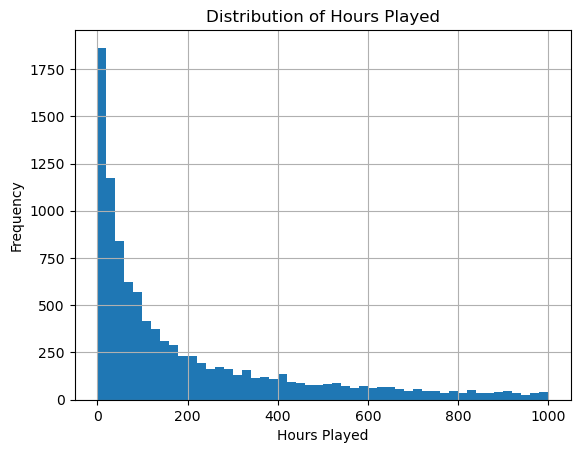

Counts of 'is_recommended':
is_recommended
True     8515
False    1485
Name: count, dtype: int64


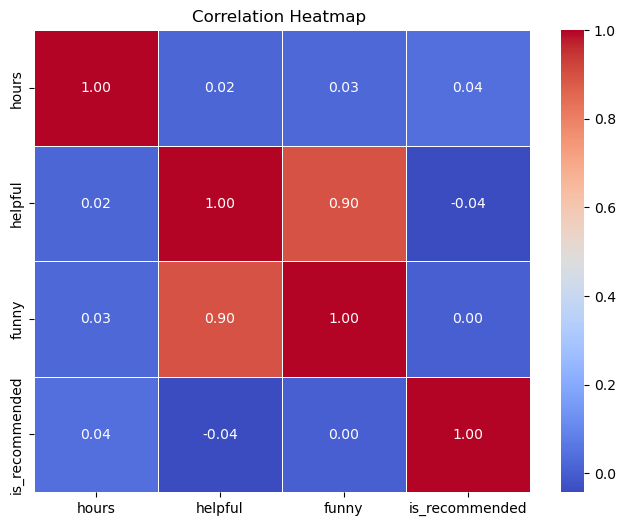

In [2]:
# Plot the distribution of hours played
recommendations_df['hours'].hist(bins=50)
plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.show()



# Print the count of True and False in the 'is_recommended' column
print("Counts of 'is_recommended':")
print(recommendations_df['is_recommended'].value_counts())

# Convert 'is_recommended' to numeric for correlation
recommendations_df['is_recommended'] = recommendations_df['is_recommended'].astype(int)

# Create the correlation matrix
corr_matrix = recommendations_df[['hours', 'helpful', 'funny', 'is_recommended']].corr()

# Plot the heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap ')
plt.show()

In [3]:
# Define features and target
X = recommendations_df[['hours', 'helpful', 'funny']]  
y = recommendations_df['is_recommended']  

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Logistic Regression Model
log_reg_model = LogisticRegression(class_weight='balanced')
log_reg_model.fit(X_train, y_train)
# Logistic Regression predictions
log_reg_preds = log_reg_model.predict(X_test)

# Initialize K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
# KNN predictions
knn_preds = knn_clf.predict(X_test)

In [5]:
# Evaluate Logistic Regression
accuracy = accuracy_score(y_test, log_reg_preds)
precision = precision_score(y_test, log_reg_preds)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

Logistic Regression Performance:
Accuracy: 0.8105
Precision: 0.9038


In [6]:
# Evaluate KNN
accuracy_knn = accuracy_score(y_test, knn_preds)
precision_knn = precision_score(y_test, knn_preds)

print("KNN Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")


KNN Performance:
Accuracy: 0.8540
Precision: 0.8785


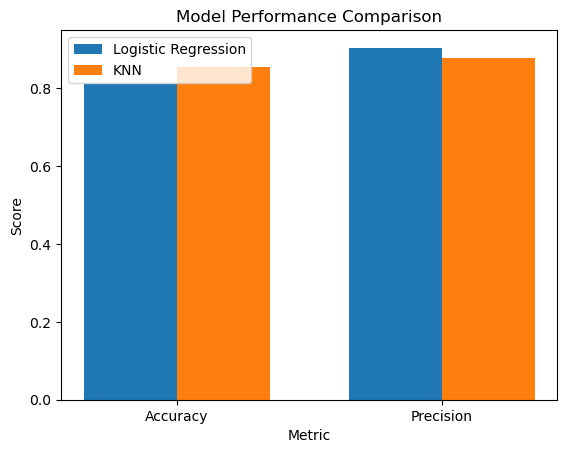

In [7]:
# Prepare metrics for plotting
metrics = ['Accuracy', 'Precision']
log_reg_scores = [accuracy_score(y_test, log_reg_preds), 
                  precision_score(y_test, log_reg_preds)]
knn_scores = [accuracy_score(y_test, knn_preds), 
              precision_score(y_test, knn_preds)]

# Bar chart width and positioning
bar_width = 0.35
index = np.arange(len(metrics))

# Create the bar chart
plt.bar(index, log_reg_scores, bar_width, label='Logistic Regression')
plt.bar(index + bar_width, knn_scores, bar_width, label='KNN')

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.show()
